In [1]:
import maxim_models as mm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
def log_progress(sequence, every=1):
    from ipywidgets import IntProgress
    from IPython.display import display

    progress = IntProgress(min=0, max=len(sequence), value=0)
    display(progress)
    
    for index, record in enumerate(sequence):
        if index % every == 0:
            progress.value = index
        yield record
    progress.bar_style='success'
    progress.value = len(sequence)

## Dataset 1

In [4]:
sigmas = np.linspace(0.7, 2, 14)
m1 = -0.5
m2 = 0.5
train_size = 400
test_size = 200
tests_num = 2
results = np.zeros([len(sigmas), 3])

lin_m = mm.one_weight_linear_model(method='linprog')
rel_m = mm.one_weight_linear_model(method='relax')
log_m = mm.one_weight_linear_model(method='logistic')
soft_m = mm.many_weight_linear_model(method='softmax')
svm_m = mm.many_weight_linear_model(method='svm')
models = [lin_m, log_m, rel_m, soft_m, svm_m]

In [46]:
%%time
rel_m.fit(X, y)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 4.48 ms


In [47]:
i = 0

In [109]:
lin_m.predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [125]:
results2 = np.zeros([len(sigmas), len(models)])
for i in log_progress(range(len(sigmas))):
    tmp_results = np.zeros([tests_num, len(models)])
    for test_i in range(tests_num):
        X1 = np.concatenate((np.random.normal(loc=0.5, scale=sigmas[i], size=[int(train_size / 2), 17]),
                    np.random.normal(loc=-0.5, scale=sigmas[i], size=[train_size - int(train_size / 2), 17]))) 
        X1 = np.concatenate((X1, np.random.normal(size=[train_size, 3])), axis=1)
        y1 = np.concatenate((np.ones(int(train_size / 2)), np.zeros(train_size - int(train_size / 2))), axis=0)
                
        for model in models:
            model.fit(X1, y1)
        
        X2 = np.concatenate((np.random.normal(loc=0.5, scale=sigmas[i], size=[int(test_size / 2), 17]),
                    np.random.normal(loc=-0.5, scale=sigmas[i], size=[test_size - int(test_size / 2), 17]))) 
        X2 = np.concatenate((X2, np.random.normal(size=[test_size, 3])), axis=1)
        y2 = np.concatenate((np.ones(int(test_size / 2)), np.zeros(test_size - int(test_size / 2))), axis=0)
        for model_i in range(len(models)):
            tmp_results[test_i, model_i] = np.sum(y2 == models[model_i].predict(X2)) / test_size
    results2[i] = np.mean(tmp_results, axis=0)

In [39]:
model_names = ['lin_m', 'log_m', 'rel_m', 'soft_m', 'svm_m']

In [123]:
lm.fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

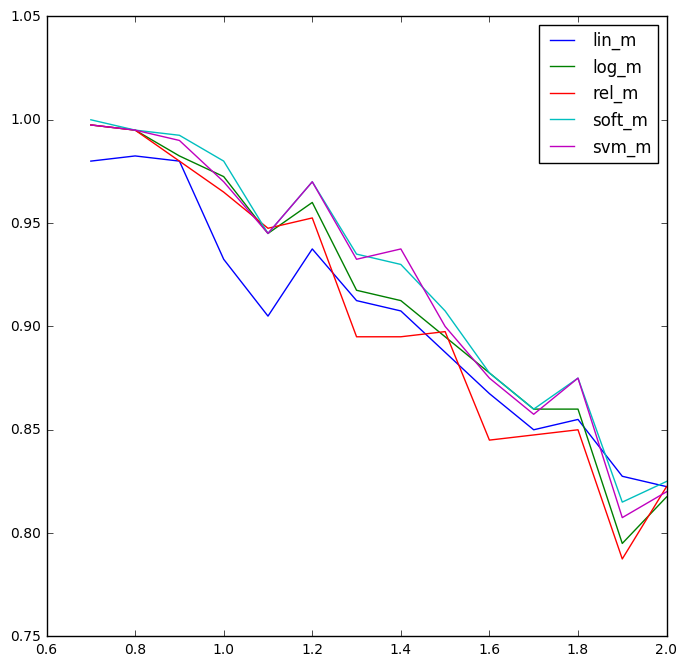

In [126]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)
for i in range(len(models)):
    ax.plot(sigmas, results2[:, i], label=model_names[i])
ax.legend()
#plt.savefig('second_dataset')

In [49]:
results2

array([[ 0.998,  0.998,  0.998,  0.998,  0.998],
       [ 0.996,  0.996,  0.996,  0.996,  0.996],
       [ 0.989,  0.989,  0.989,  0.989,  0.989],
       [ 0.983,  0.983,  0.983,  0.983,  0.983],
       [ 0.967,  0.967,  0.967,  0.967,  0.967],
       [ 0.952,  0.952,  0.952,  0.952,  0.952],
       [ 0.929,  0.929,  0.929,  0.929,  0.929],
       [ 0.934,  0.934,  0.934,  0.934,  0.934],
       [ 0.906,  0.906,  0.906,  0.906,  0.906],
       [ 0.906,  0.906,  0.906,  0.906,  0.906],
       [ 0.887,  0.887,  0.887,  0.887,  0.887],
       [ 0.876,  0.876,  0.876,  0.876,  0.876],
       [ 0.847,  0.847,  0.847,  0.847,  0.847],
       [ 0.827,  0.827,  0.827,  0.827,  0.827]])

In [61]:
%%time
for it in log_progress(np.arange(len(sigmas)), every=1):
    tmp_results = np.zeros([tests_num, len(models)])
    for test in np.arange(tests_num):
        X = np.concatenate((np.random.normal(loc=-0.5, scale=sigmas[it], size=[int(train_size / 2), 2000]),
                            np.random.normal(loc=0.5, scale=sigmas[it], size=[int(train_size / 2), 2000])))
        y = np.concatenate((np.zeros(int(train_size / 2)), np.ones(train_size - int(train_size / 2))))
        for model in models:
            model.fit(X, y)
        
        X = np.concatenate((np.random.normal(loc=-0.5, scale=sigmas[it], size=[int(test_size / 2), 2000]),
                            np.random.normal(loc=0.5, scale=sigmas[it], size=[int(test_size / 2), 2000])))
        y = np.concatenate((np.zeros(int(test_size / 2)), np.ones(test_size - int(test_size / 2))))
        
        for i in range(len(models)):
            tmp_results[test, i] = np.sum(models[i].predict(X) == y) / X.shape[0]
    results[it] = np.mean(tmp_results, axis=0)

CPU times: user 7min 9s, sys: 2min 49s, total: 9min 58s
Wall time: 6min 42s


In [104]:
results[:, 0]

array([ 0.983  ,  0.97875,  0.971  ,  0.95975,  0.912  ,  0.939  ,
        0.925  ,  0.91425,  0.90075,  0.84525,  0.8445 ,  0.87075,
        0.8425 ,  0.851  ])

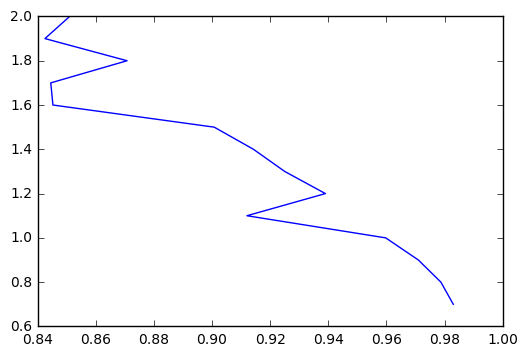

In [105]:
plt.plot(results[:, 1], sigmas)

In [77]:
log_res = []
for it in log_progress(np.arange(len(sigmas)), every=1):
    tmp_results = np.zeros([tests_num])
    for test in np.arange(tests_num):
        X = np.concatenate((np.random.normal(loc=-0.5, scale=sigmas[it], size=[int(train_size / 2), 2000]),
                            np.random.normal(loc=0.5, scale=sigmas[it], size=[int(train_size / 2), 2000])))
        y = np.concatenate((np.zeros(int(train_size / 2)), np.ones(train_size - int(train_size / 2))))
        lm.fit(X, y)
        
        X = np.concatenate((np.random.normal(loc=-0.5, scale=sigmas[it], size=[int(test_size / 2), 2000]),
                            np.random.normal(loc=0.5, scale=sigmas[it], size=[int(test_size / 2), 2000])))
        y = np.concatenate((np.zeros(int(test_size / 2)), np.ones(test_size - int(test_size / 2))))
        
        tmp_results[test] = np.sum(lm.predict(X) == y) / X.shape[0]
    log_res.append(np.mean(tmp_results))

In [78]:
log_res

[0.99333333333333329,
 0.99166666666666659,
 0.95833333333333337,
 0.92833333333333334,
 0.89500000000000002,
 0.84166666666666667,
 0.84166666666666667,
 0.82833333333333348,
 0.76166666666666671,
 0.76500000000000001,
 0.74833333333333341,
 0.70999999999999996,
 0.66999999999999993,
 0.68000000000000005]

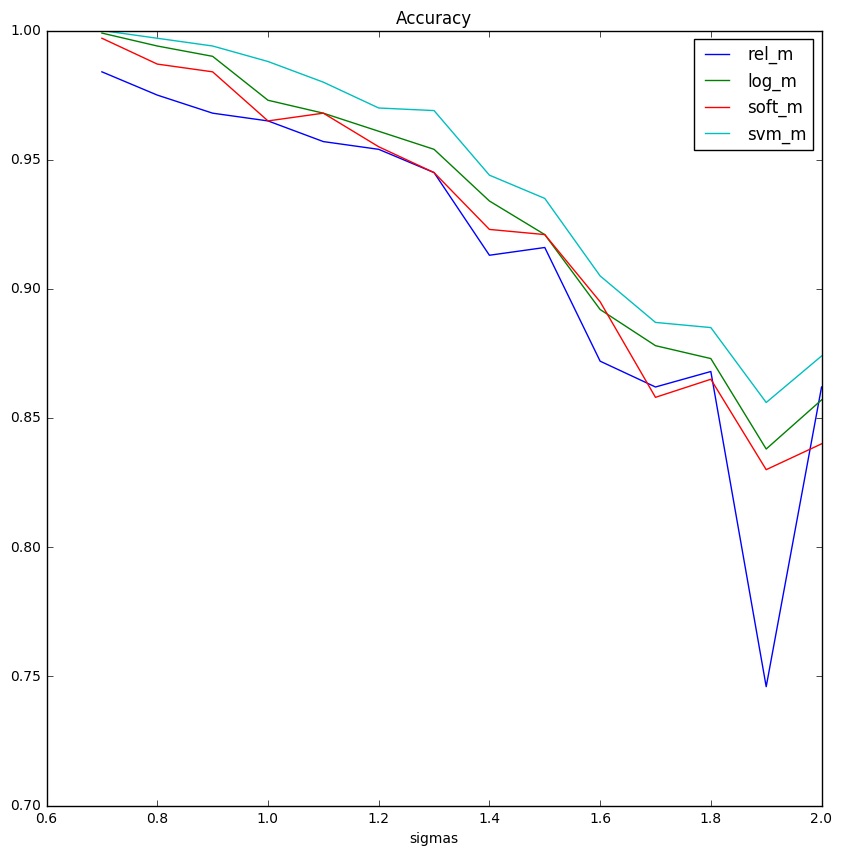

In [24]:
plt.figure(figsize=[10, 10])
plt.plot(sigmas, results[:, 0], label='rel_m')
plt.plot(sigmas, results[:, 1], label='log_m')
plt.plot(sigmas, results[:, 2], label='soft_m')
plt.plot(sigmas, results[:, 3], label='svm_m')
plt.legend()
plt.xlabel('sigmas')
plt.title('Accuracy')
#plt.savefig('first_dataset')

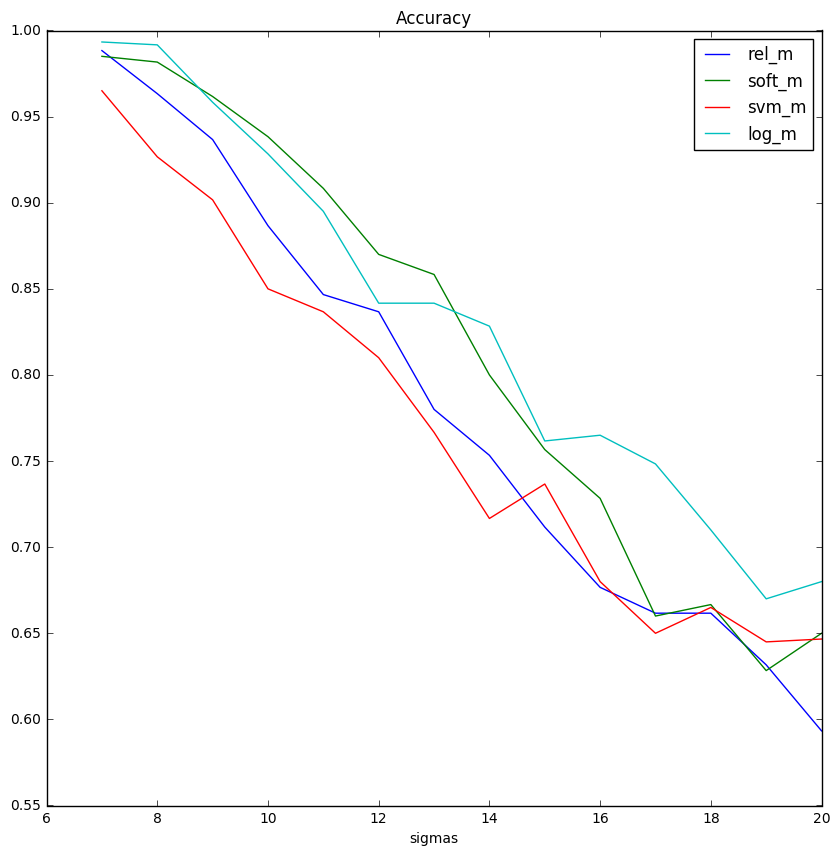

In [79]:
plt.figure(figsize=[10, 10])
plt.plot(sigmas, results[:, 0], label='rel_m')
plt.plot(sigmas, results[:, 1], label='soft_m')
plt.plot(sigmas, results[:, 2], label='svm_m')
plt.plot(sigmas, log_res, label='log_m')
plt.legend()
plt.xlabel('sigmas')
plt.title('Accuracy')
plt.savefig('third_dataset')

In [3]:
from sklearn import datasets

In [52]:
ds = datasets.load_breast_cancer()

In [53]:
X = ds.data
y = ds.target

In [54]:
X = (X - X.mean()) / np.sqrt(X.std(ddof=1))

In [55]:
import seaborn as sns
sns.set()

In [56]:
import pandas as pd

In [57]:
df = pd.DataFrame.from_records(X)

In [58]:
df['response'] = y

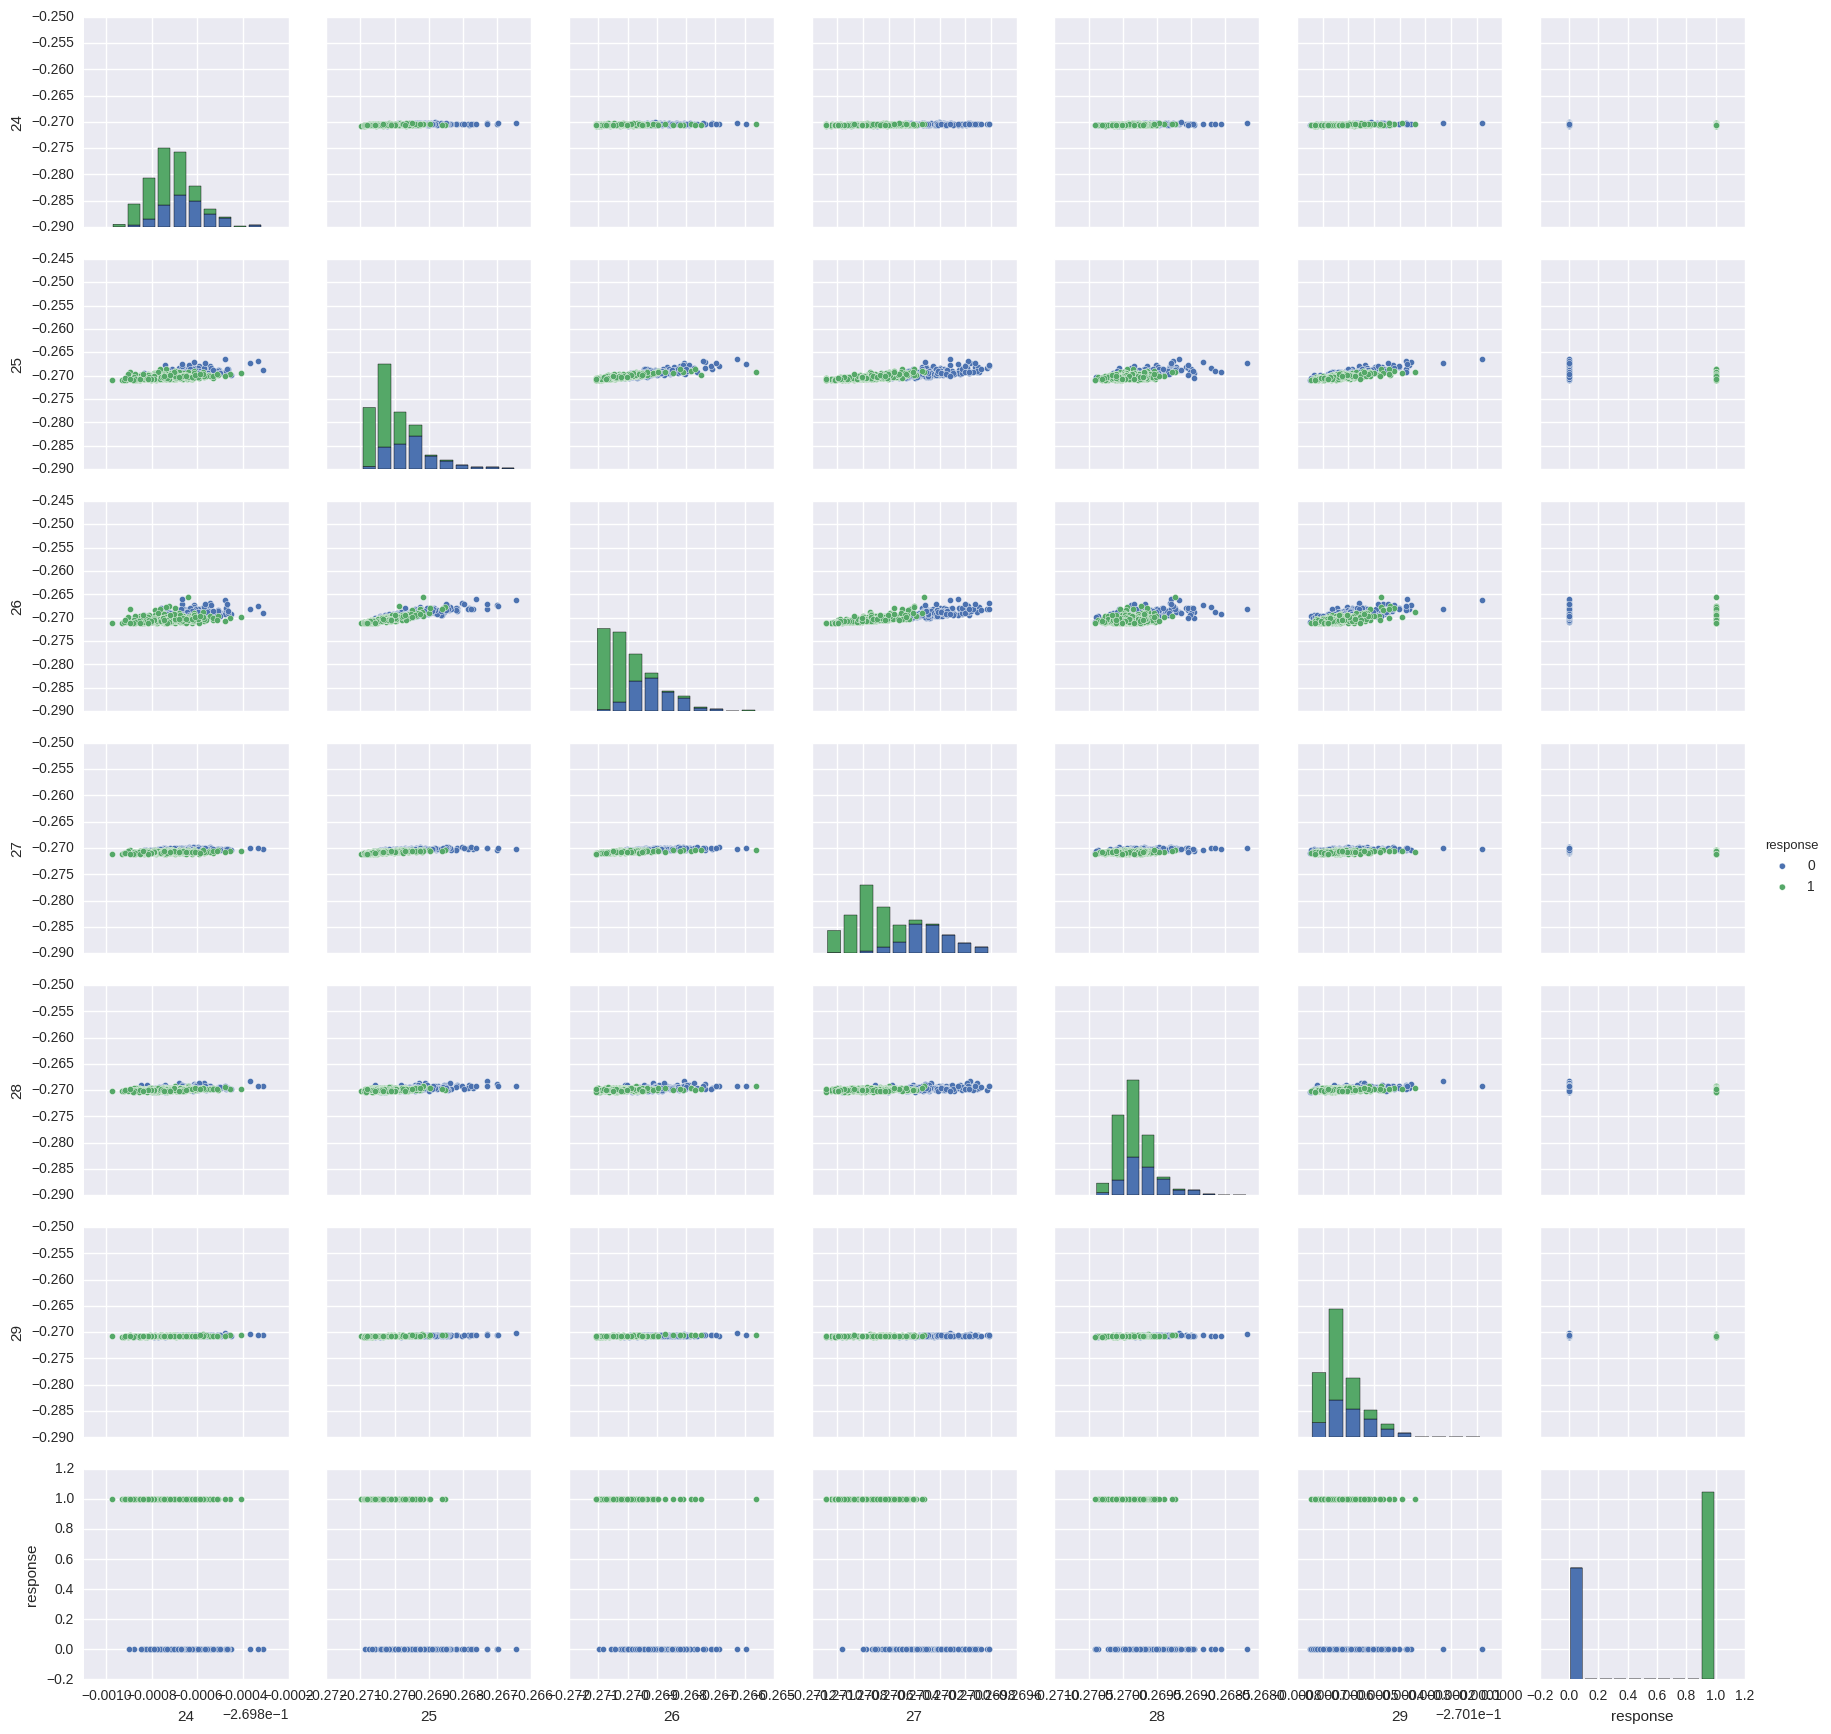

In [11]:
sns.pairplot(df.iloc[:, 24:], hue='response')

In [141]:
print(ds.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [10]:
import sklearn.model_selection as ms

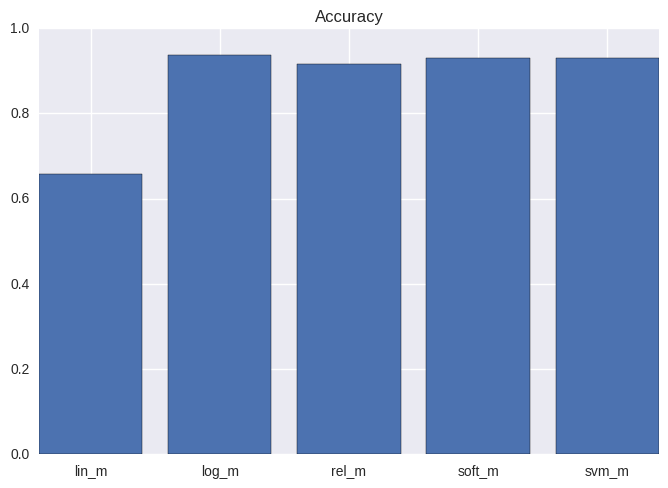

In [86]:
results_breast = np.zeros(len(models))

res_lm = 0

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.25)

for model_i in range(len(models)):
    models[model_i].fit(X_train, y_train)
    lm.fit(X_train, y_train)
    results_breast[model_i] = np.sum(y_test == models[model_i].predict(X_test)) / X_test.shape[0]
    res_lm = np.sum(y_test == lm.predict(X_test)) / X_test.shape[0]

plt.xticks(np.arange(5), model_names)
plt.title('Accuracy')
plt.bar(np.arange(5), results_breast, align='center')
#plt.savefig('fifth_dataset')

In [85]:
res_lm

0.92307692307692313

In [87]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

In [6]:
from sklearn import datasets
ds = datasets.fetch_20newsgroups_vectorized()

In [7]:
X = ds.data

y = ds.target

In [8]:
X = ds.data[((y == 19) + (y == 1)) > 0]

y = y[((y == 19) + (y == 1)) > 0]

In [11]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.25)

In [12]:
lm.fit(X_train, y_train)

NameError: name 'lm' is not defined

In [44]:
y = np.concatenate((np.zeros(250), np.ones(250)))
xx = np.random.normal(size = [500, 130000])

In [47]:
%%time
soft_m.fit(xx, y)

CPU times: user 4min 13s, sys: 60 ms, total: 4min 13s
Wall time: 4min 13s


(array([  1.00000000e+00,   0.00000000e+00,   6.00000000e+00,
          2.20000000e+01,   3.36000000e+02,   1.19770000e+05,
          9.71100000e+03,   1.40000000e+02,   1.10000000e+01,
          4.00000000e+00]),
 array([ -6.22600675e-05,  -5.16418050e-05,  -4.10235425e-05,
         -3.04052800e-05,  -1.97870175e-05,  -9.16875495e-06,
          1.44950755e-06,   1.20677700e-05,   2.26860325e-05,
          3.33042950e-05,   4.39225575e-05]),
 <a list of 10 Patch objects>)

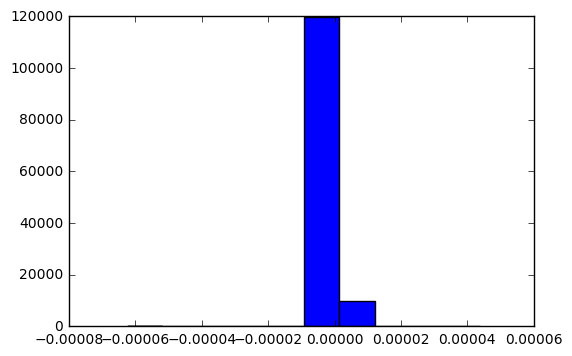

In [52]:
plt.hist(soft_m.W.mean(axis=1))

In [43]:
X.shape[1]

130107

In [15]:
log_m.fit(X_train, y_train)

ValueError: zero-dimensional arrays cannot be concatenated

In [164]:
np.sum(lm.predict(X_test) == y_test) / X_test.shape[0]

0.92531120331950212